---

# **Project Proposal: Diabetes Prediction**

---

#### **Introduction:**
This project aims to apply machine learning techniques to develop a predictive model capable of determining the likelihood of an individual developing diabetes based on various health-related features. Diabetes is a prevalent chronic disease, and early prediction can help in its management and prevention. This project will explore relationships between key factors such as age, body mass index (BMI), blood pressure, glucose levels, and family history to predict the risk of diabetes.

---

#### **Project Objective:**
The objective of this project is to:
- Build a predictive model using a dataset containing individual health features such as age, BMI, glucose levels, insulin, and family history.
- Identify the most influential factors that contribute to the development of diabetes.
- Provide a machine learning solution that predicts the likelihood of diabetes in unseen test data.

---

#### **Dataset:**
The project will rely on the **Pima Indians Diabetes Dataset**, which includes the following columns:
- **Outcome:** The target variable (0 = No Diabetes, 1 = Diabetes).
- **Pregnancies:** Number of pregnancies the individual has had.
- **Glucose:** Plasma glucose concentration.
- **BloodPressure:** Diastolic blood pressure.
- **SkinThickness:** Skinfold thickness.
- **Insulin:** Insulin level.
- **BMI:** Body Mass Index (BMI).
- **DiabetesPedigreeFunction:** A function representing the family history of diabetes.
- **Age:** Age of the individual.

---

#### **Methodology:**

1. **Stage 1: Data Exploration (Data Exploration):**
   - Explore the general distribution of the dataset using visualizations such as **histograms**, **scatter plots**, and **correlation matrices**.
   - Identify columns with missing values, outliers, and perform an initial analysis of the dataset.

2. **Stage 2: Data Preprocessing:**
   - **Handling Missing Values:** Use techniques like replacing missing values with the **mean** or **median** for numerical columns (e.g., BMI, Age) and **mode** for categorical columns.
   - **Outlier Handling:** Detect and address outliers in critical features such as **glucose** and **insulin** to ensure robust model performance.
   - **Feature Engineering:** Normalize or standardize certain features like **BMI** and **glucose** to enhance model convergence.

3. **Stage 3: Feature Encoding and Selection:**
   - **Feature Encoding:** Convert categorical features (e.g., Outcome) into numeric representations.
   - **Feature Selection:** Evaluate the importance of each feature using techniques like **correlation matrices** and **feature importance** to identify the most relevant ones.

4. **Stage 4: Model Building:**
   - Implement various machine learning models to create the predictive model, including:
     - **Logistic Regression** for probabilistic classification.
     - **Decision Tree Classifier** for capturing non-linear relationships.
     - **Random Forest Classifier** for improved performance through an ensemble approach.
     - **Support Vector Machine (SVM)** for margin-based classification.

5. **Stage 5: Model Evaluation:**
   - Evaluate each model using metrics such as **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **AUC**.
   - Compare the models' performances to select the most accurate one for final prediction.

6. **Stage 6: Prediction and Submission:**
   - Use the best-performing model to predict the diabetes outcomes for an unseen test dataset.
   - Prepare the results in the required format for submission.

---

#### **Proposed Models:**
- **Logistic Regression:** A simple and interpretable linear model useful for binary classification tasks.
- **Decision Tree Classifier (DTC):** A non-linear model that partitions data based on a series of decisions, easy to interpret and visualize.
- **Random Forest Classifier (RFC):** An ensemble method that uses multiple decision trees to improve performance and reduce overfitting.
- **Support Vector Machine (SVM):** A powerful model that works well for classification tasks by finding the optimal hyperplane.

---

#### **Techniques and Tools:**
- **Programming Language:** Python
- **Libraries Used:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
- **Machine Learning Techniques:** **Supervised Learning**, **Classification Models**

---

#### **Expected Outcomes:**
- The project aims to build an accurate model that predicts the likelihood of diabetes based on the available health features.
- The expected performance for the diabetes prediction model is to achieve **75% to 85%** accuracy, depending on the quality of data preprocessing and model tuning. However, the final results will be determined based on the small dataset available to us.

---

#### **Challenges:**
- **Handling Missing Data:** Some columns may have missing values, which could affect the model’s performance. Techniques like imputation will be used to address this.
- **Outliers:** Extreme values in features like glucose and insulin could skew the results, requiring careful handling.
- **Imbalanced Classes:** The target variable may be imbalanced, with fewer positive cases (diabetes) than negative cases, necessitating techniques like **SMOTE** or **class weighting**.

---

#### **Expected Results:**
- Deliver a functional machine learning model that accurately predicts diabetes risk for individuals based on key health indicators.
- Identify and analyze the most significant health factors influencing diabetes development, such as **BMI**, **glucose levels**, and **age**.

---

# 1. **Importing Essential Libraries**

- In this step, we import the essential libraries we need to work with:
  - `numpy`: A library for mathematical operations and numerical analysis.
  - `pandas`: A library for data manipulation, such as reading data from files, cleaning, and analysis.
  - `seaborn`: A library for advanced plotting and data visualization.
  - `matplotlib`: A library for creating basic plots.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

# 2. **Reading the Data**

- In this step, we read CSV data files:
  - `df_train`: The training data.
  - `df_test`: The test data.
- Then, we display the first 5 rows of each dataset using `.head(5)` to review the content.


In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Data File/13_Diabetes_Data/01_Diabetes_Train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data File/13_Diabetes_Data/02_Diabetes_Test_Data.csv')

In [3]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,3
2,5,116,74,0,0,25.6,0.201,30,0,5
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8


In [4]:
df_test.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Id
0,6,148,72,35,0,33.6,0.627,50,0
1,8,183,64,0,0,23.3,0.672,32,2
2,0,137,40,35,168,43.1,2.288,33,4
3,3,78,50,32,88,31.0,0.248,26,6
4,7,100,0,0,0,30.0,0.484,32,15


---

# 3. **Exploring the Data**

- We use several methods to explore the data:
  - `.info()`: To get information about the columns, data types, and non-null values.
  - `.describe().T`: To get basic statistics like mean, standard deviation, and transpose the results for clarity.
  - `.columns`: To list the column names.
  - `.shape`: To get the dimensions of the dataset (number of rows and columns).


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               550 non-null    int64  
 1   Glucose                   550 non-null    int64  
 2   BloodPressure             550 non-null    int64  
 3   SkinThickness             550 non-null    int64  
 4   Insulin                   550 non-null    int64  
 5   BMI                       550 non-null    float64
 6   DiabetesPedigreeFunction  550 non-null    float64
 7   Age                       550 non-null    int64  
 8   Outcome                   550 non-null    int64  
 9   Id                        550 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 43.1 KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               218 non-null    int64  
 1   Glucose                   218 non-null    int64  
 2   BloodPressure             218 non-null    int64  
 3   SkinThickness             218 non-null    int64  
 4   Insulin                   218 non-null    int64  
 5   BMI                       218 non-null    float64
 6   DiabetesPedigreeFunction  218 non-null    float64
 7   Age                       218 non-null    int64  
 8   Id                        218 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 15.5 KB


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,550.0,4.034545,3.447325,0.000,1.00000,3.000,6.00000,17.00
Glucose,550.0,121.560000,30.551206,0.000,100.00000,119.000,141.00000,197.00
BloodPressure,550.0,69.381818,19.036147,0.000,62.00000,72.000,80.00000,122.00
SkinThickness,550.0,20.014545,15.898006,0.000,0.00000,22.000,32.00000,63.00
Insulin,550.0,80.141818,115.429640,0.000,0.00000,22.500,128.75000,846.00
BMI,550.0,31.902000,7.822178,0.000,27.20000,32.000,36.50000,59.40
DiabetesPedigreeFunction,550.0,0.466582,0.320054,0.078,0.23925,0.375,0.62825,2.42
Age,550.0,33.590909,12.054140,21.000,24.00000,29.000,41.00000,81.00
Outcome,550.0,0.354545,0.478811,0.000,0.00000,0.000,1.00000,1.00
Id,550.0,379.630909,222.127731,1.000,187.25000,377.500,571.50000,766.00


In [8]:
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Id'],
      dtype='object')

In [9]:
df_train.shape

(550, 10)

### **df_train** Data Summary

- The dataset contains **10 columns** and **550 rows**.
- The columns with **int64 values** are: **Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, Outcome, Id**.
- The columns with **float64 values** are: **BMI, DiabetesPedigreeFunction**.
- The dataset does **not** have any columns with missing values.

### **df_test** Data Summary

- The dataset contains **9 columns** and **218 rows**.
- The columns with **int64 values** are: **Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, Id**.
- The columns with **float64 values** are: **BMI, DiabetesPedigreeFunction**.
- The dataset does **not** have any columns with missing values.

---

**Note $1$: The Data is Free from Missing Values**

The dataset used in this project is clean and does not contain any missing values. All the required fields are complete, ensuring that we can proceed with the analysis and model building without the need for additional handling of missing data.



---

**Note $2$: Removing the (ID) Column from Training and Test Data**

- The (ID) column will be removed from both the **`df_train`** and **`df_test`**, as it does not contribute to the prediction process or the visualization of the data.



In [10]:
df_train = df_train.drop(columns=['Id'])
df_test = df_test.drop(columns=['Id'])

---

# 4. **Visualizing Training Data Columns**


 📍 $Correlation$ $matrix$

In [11]:
corr = df_train.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.117231,0.140885,-0.039094,-0.064669,0.026409,-0.053552,0.556723,0.194511
Glucose,0.117231,1.000000,0.131188,0.097238,0.345030,0.259534,0.129336,0.263326,0.497304
BloodPressure,0.140885,0.131188,1.000000,0.213033,0.079570,0.267211,0.052901,0.218771,0.044873
SkinThickness,-0.039094,0.097238,0.213033,1.000000,0.478493,0.388680,0.220377,-0.124987,0.085944
Insulin,-0.064669,0.345030,0.079570,0.478493,1.000000,0.186681,0.186442,-0.039476,0.170530
BMI,0.026409,0.259534,0.267211,0.388680,0.186681,1.000000,0.137148,-0.013692,0.291952
DiabetesPedigreeFunction,-0.053552,0.129336,0.052901,0.220377,0.186442,0.137148,1.000000,-0.006865,0.162585
Age,0.556723,0.263326,0.218771,-0.124987,-0.039476,-0.013692,-0.006865,1.000000,0.206326
Outcome,0.194511,0.497304,0.044873,0.085944,0.170530,0.291952,0.162585,0.206326,1.000000


 📍 $Heatmap$

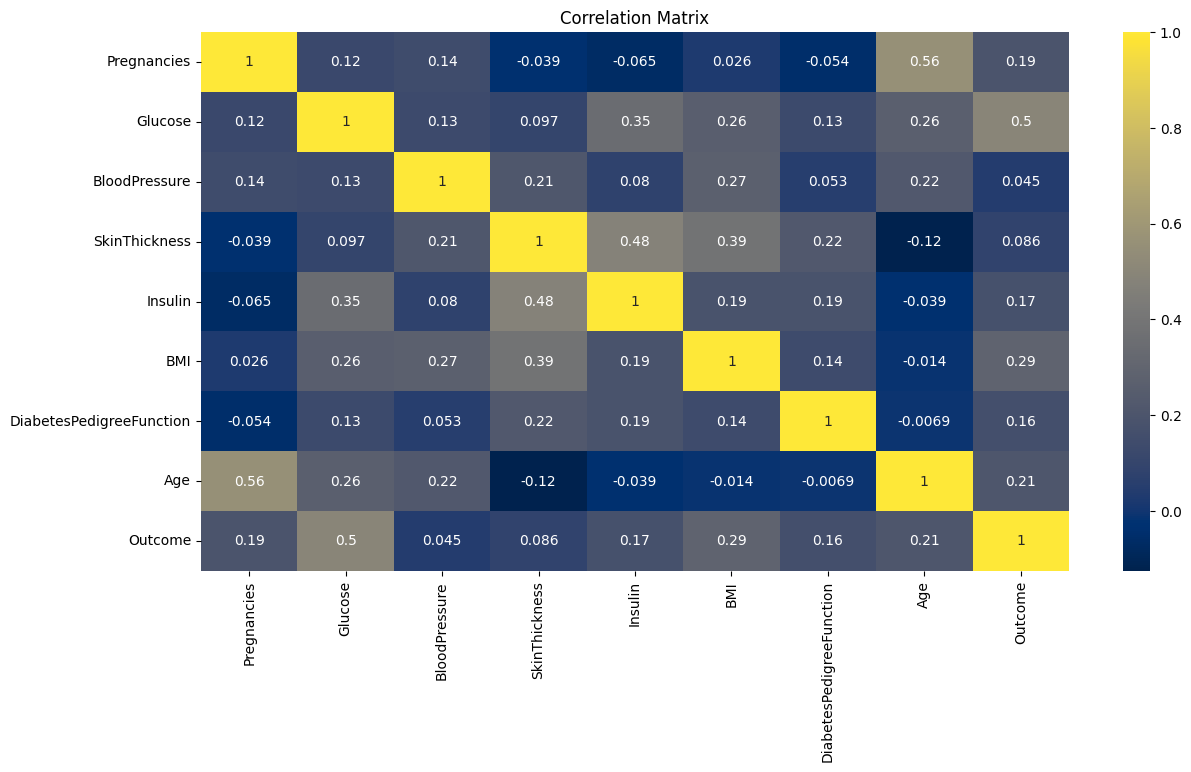

In [12]:
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()

####  **Insights from Correlation Matrix and Heatmap:**

- **Strong positive correlation between Glucose and Outcome (0.5):** This indicates that higher glucose levels are strongly associated with a higher likelihood of diabetes.
- **Moderate positive correlation between BMI and Outcome (0.29):** Higher Body Mass Index (BMI) is moderately associated with a higher likelihood of diabetes.
- **Moderate positive correlation between Age and Outcome (0.21):** Older age is moderately associated with a higher likelihood of diabetes.
- **Weak positive correlation between Insulin and Outcome (0.17):** There is a slight association between higher insulin levels and the likelihood of diabetes.
- **Very weak positive correlation between Blood Pressure and Outcome (0.045):** Blood pressure shows a very weak association with the likelihood of diabetes.
- **Weak positive correlation between Pregnancies and Outcome (0.19):** The number of pregnancies has a slight association with the likelihood of diabetes.

- **Very weak negative correlation between Diabetes Pedigree Function and Outcome (-0.011):** The diabetes pedigree function shows a very weak negative association with the likelihood of diabetes.
- **Very weak correlation between Skin Thickness and Outcome (0.0007):** Skin thickness has almost no association with the likelihood of diabetes.

- **Skin Thickness and Insulin (0.48):** There is a moderate positive correlation between skin thickness and insulin levels, suggesting that thicker skin may be associated with higher insulin levels.
- **Glucose and Insulin (0.35):** There is a moderate positive correlation between glucose levels and insulin levels, indicating that higher glucose levels are associated with higher insulin levels.
- **Very weak correlation between BMI and Diabetes Pedigree Function (0.14):** BMI does not show a strong correlation with the diabetes pedigree function.



---

## $Histogram$



- We present a Histogram to show the relationship between `Glucose` and `Outcome`.

- We present a Histogram to show the relationship between `BMI` and `Outcome`.

- We present a Histogram to show the relationship between `Age` and `Outcome`.

- We present a Histogram to show the relationship between `Insulin` and `Outcome`.

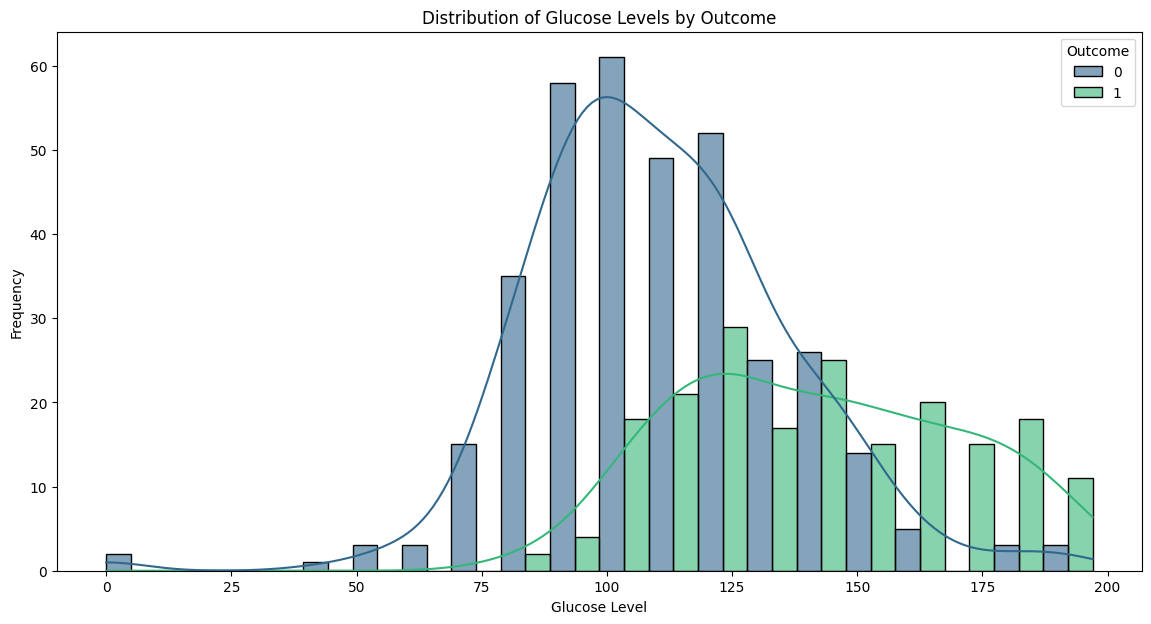

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

sns.histplot(data=df_train,
             x='Glucose',
             hue='Outcome',
             kde=True,
             palette='viridis',
             alpha=0.6,
             multiple="dodge")

plt.title('Distribution of Glucose Levels by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()


**Distribution of Glucose Levels by Outcome**

Although both groups include individuals without diabetes, glucose levels tend to be slightly higher in those with diabetes compared to those without.



---





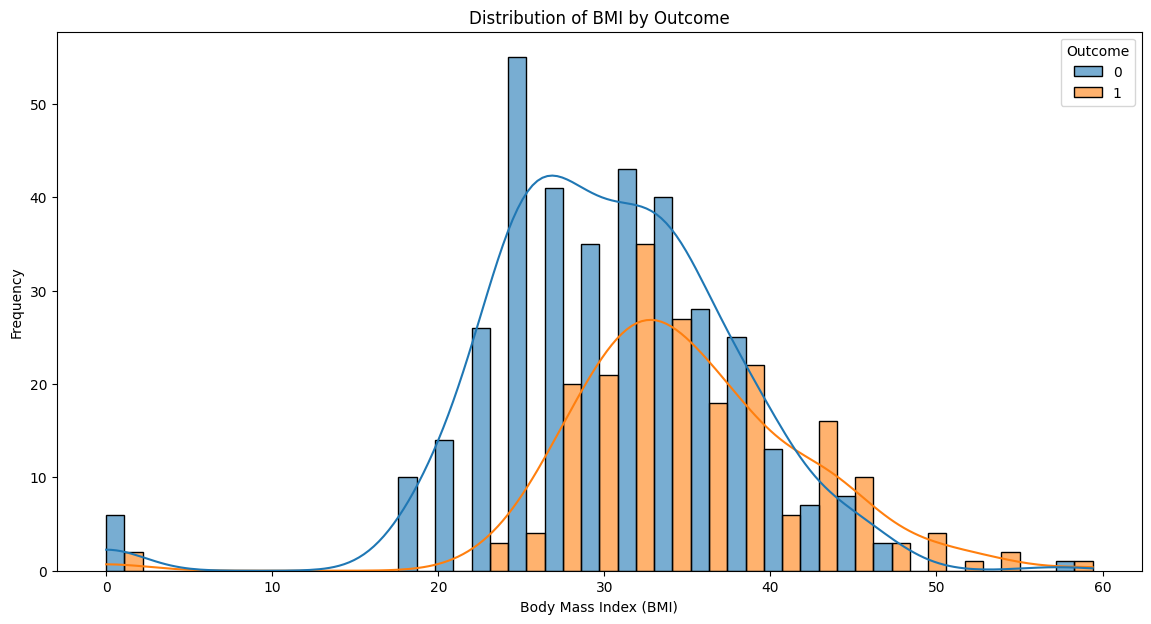

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

sns.histplot(data=df_train,
             x='BMI',
             hue='Outcome',
             kde=True,
             color='viridis',
             alpha=0.6,
             multiple="dodge")

plt.title('Distribution of BMI by Outcome')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.show()



**Distribution of Glucose Levels and BMI by Outcome**

These graphs suggest that high glucose levels and a high BMI are associated with an increased risk of diabetes, which aligns with the common understanding that diabetes is often linked to obesity and high blood sugar levels.

---

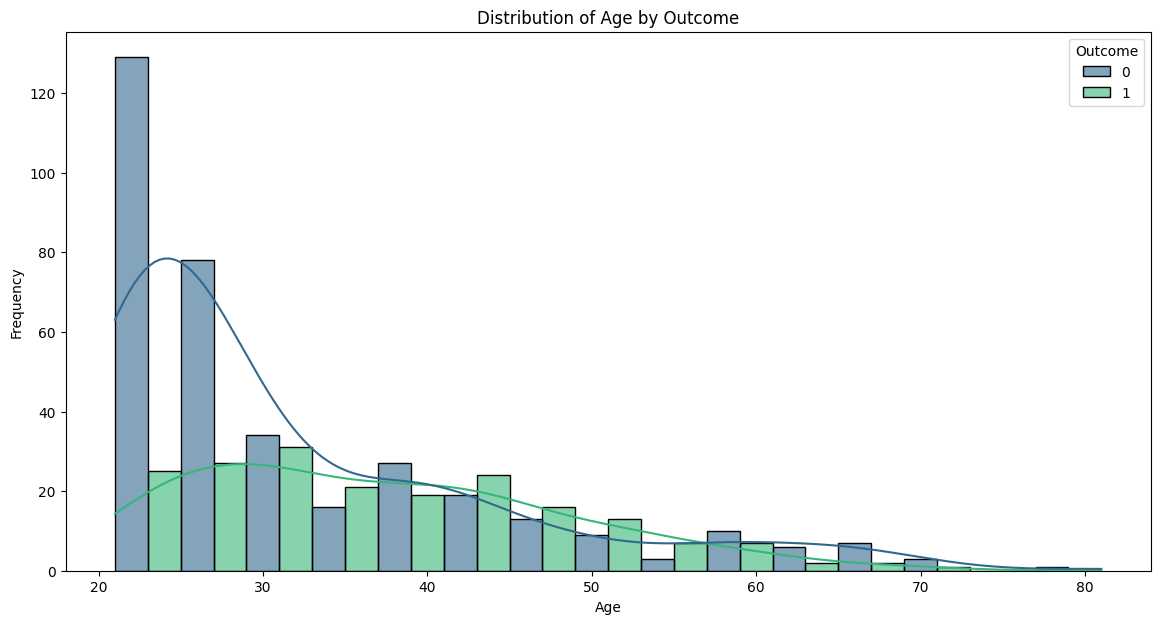

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

sns.histplot(data=df_train,
             x='Age',
             hue='Outcome',
             kde=True,
             palette='viridis',
             alpha=0.6,
             multiple="dodge")

plt.title('Distribution of Age by Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Analysis of Age Distribution by Outcome**

The plot suggests a potential relationship between age and outcome. It appears that younger individuals are **not diabetic**, while older individuals are more likely to be **diabetic**.

---

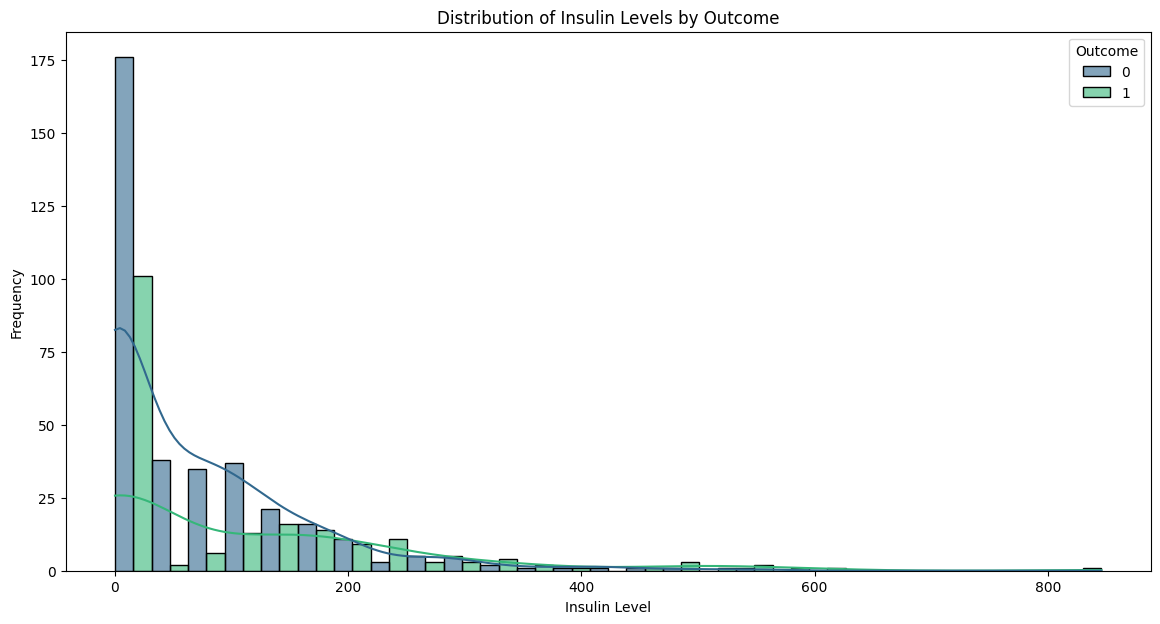

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

sns.histplot(data=df_train,
             x='Insulin',
             hue='Outcome',
             kde=True,
             palette='viridis',
             alpha=0.6,
             multiple="dodge")

plt.title('Distribution of Insulin Levels by Outcome')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.show()

**Distribution of Insulin Levels by Outcome**  

Individuals with diabetes (Outcome 1) have higher insulin levels compared to those without diabetes (Outcome 0), which may be due to insulin resistance experienced by diabetic patients.

---



## $Scatterplot$

- We present a scatterplot to show the relationship between `Skin Thickness` and `Insulin`.

- We present a scatterplot to show the relationship between `Glucose` and `Insulin`.

- We present a scatterplot to show the relationship between `BMI` and `Diabetes Pedigree Function`.



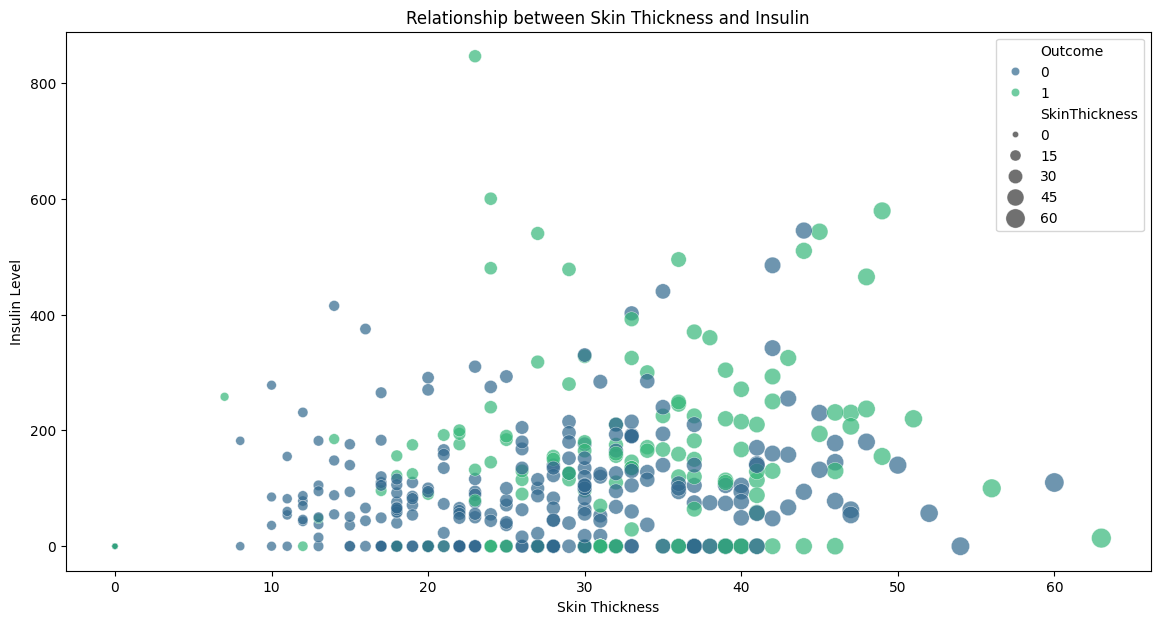

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

sns.scatterplot(data=df_train,
                x='SkinThickness',
                y='Insulin',
                hue='Outcome',
                palette='viridis',
                alpha=0.7,
                size='SkinThickness',
                sizes=(20, 200))

plt.title('Relationship between Skin Thickness and Insulin')
plt.xlabel('Skin Thickness')
plt.ylabel('Insulin Level')
plt.show()

**Skin Thickness and Insulin Levels**

The data suggests that as skin thickness increases and insulin levels rise, the likelihood of developing diabetes also increases. This indicates a positive relationship between skin thickness and insulin levels, where greater skin thickness may serve as an indicator of higher diabetes risk. However, there is significant variability in insulin levels at each skin thickness value, reflecting the diversity of individual responses.



---



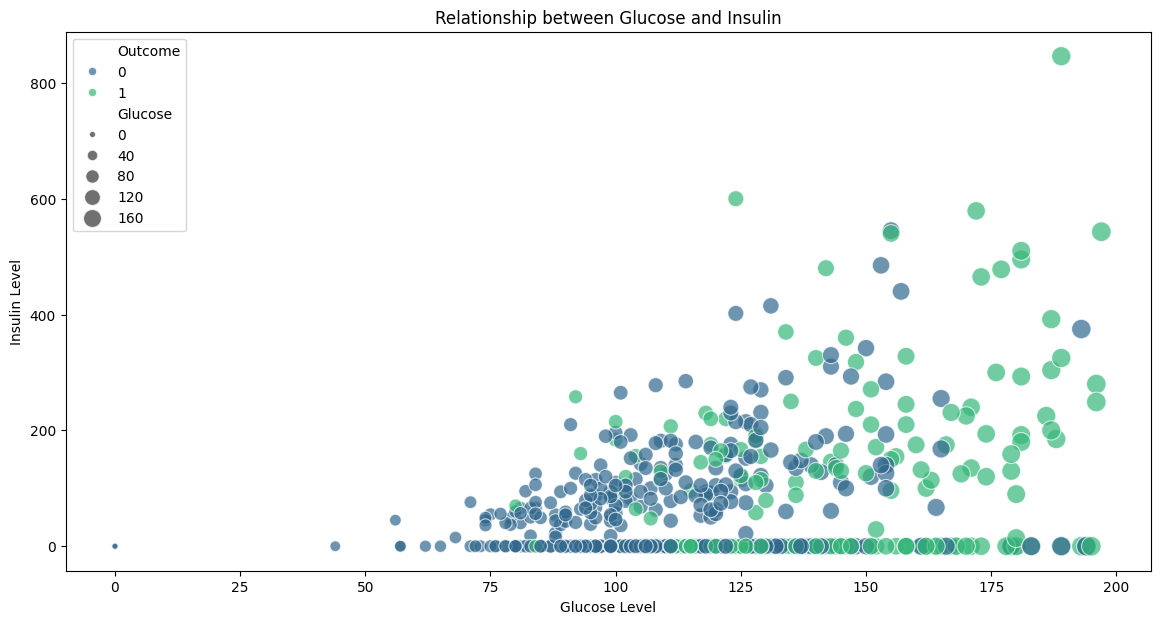

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

sns.scatterplot(data=df_train,
                x='Glucose',
                y='Insulin',
                hue='Outcome',
                palette='viridis',
                alpha=0.7,
                size='Glucose',
                sizes=(20, 200))

plt.title('Relationship between Glucose and Insulin')
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
plt.show()


**Glucose and Insulin Levels in Diabetic Patients**

The data shows a positive relationship between glucose and insulin levels, with insulin levels increasing as glucose levels rise. This suggests insulin resistance in diabetic patients. However, there are some outliers where insulin is high despite relatively low glucose levels, indicating variability in individual responses.

---


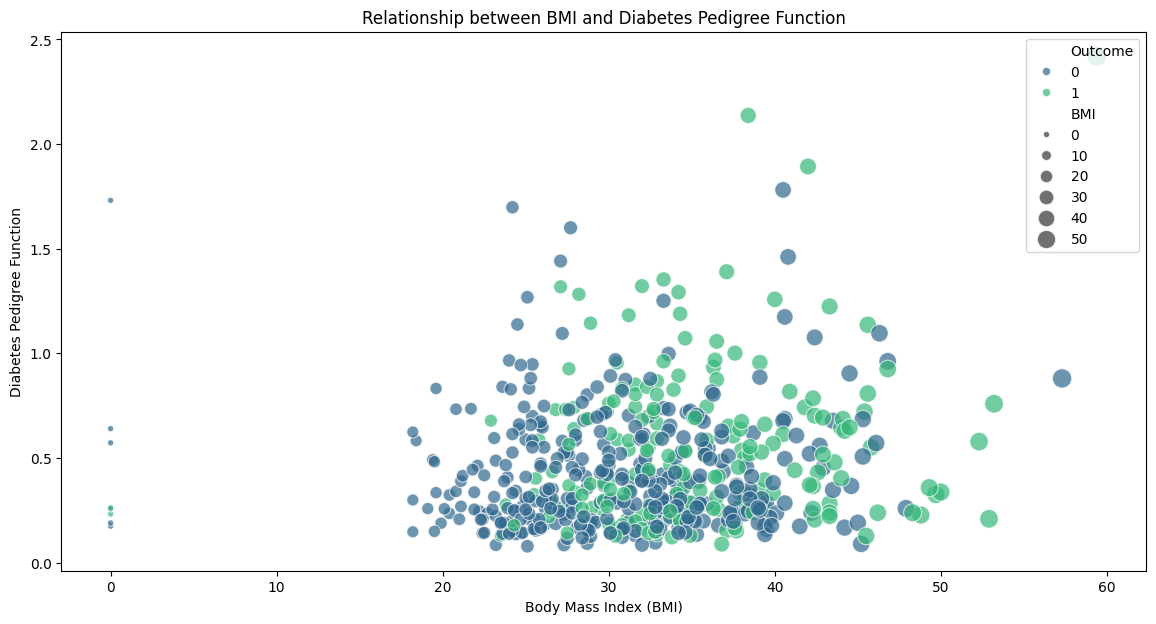

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

sns.scatterplot(data=df_train,
                x='BMI',
                y='DiabetesPedigreeFunction',
                hue='Outcome',
                palette='viridis',
                alpha=0.7,
                size='BMI',
                sizes=(20, 200))

plt.title('Relationship between BMI and Diabetes Pedigree Function')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()


**Relationship Between BMI and Diabetes Pedigree Function**

The scatter plot shows a weak positive correlation between body mass index (BMI) and diabetes pedigree function, with both increasing together. However, the relationship is not strong enough to confirm a direct impact.

---


**Note: Handling Outliers**

Since the dataset we are working with is small, we will not remove the outliers. Retaining all the data is crucial in this case, as removing outliers could negatively impact the results and reduce the accuracy of the trained models.

---

# 5.**Splitting Data**

❐ **Objective** : Separate the dataset into features (**X**) and target (**y**) for model preparation.

❐ **Purpose** : Isolate independent variables (**X**) and the dependent variable (**y**) to streamline the modeling process.

In [20]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Outcome' , axis = 1)
y = df_train['Outcome']

X_train , X_val , y_train , y_val = train_test_split(X,y,test_size= 0.3 , random_state= 42)

---

# 6. **Scaling**

❐ **Scaling** data to improve the performance of statistical models and machine learning by transforming the distribution of values, which enhances accuracy and efficiency in analysis.

### Scaling Method Used

**StandardScaler**

### How Scaling is Applied:

- **`fit_transform`** is used on **X_train** because it learns the scaling parameters (such as the mean and standard deviation) from the training data and applies the scaling to **X_train**.

- **`transform`** is then used on **X_test** to scale the test data based on the parameters learned from **X_train**, without recalculating the scaling parameters to prevent data leakage.

---


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [23]:
scaling_test = scaler.transform(df_test)



---

# 7. **Modeling**

- We will now use several models to predict whether passengers survived the Titanic disaster. The models we will use are:
  1. **Logistic Regression**
  2. **Decision Tree Classifier**
  3. **Random Forest Classifier**


#### ①  Logistic Regression (LogReg)


####**→ Create the Model**


In [24]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg

LogisticRegression()

####**→  Defining the Parameter Grid**

In [25]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200],
    'class_weight': [None, 'balanced'],
    'tol': [1e-4]
             }

####**→  Setting Up GridSearchCV**

In [26]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV (LogReg , param_grid , cv=5)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs'], 'tol': [0.0001]})

####**→  Fitting the Model Using GridSearchCV**

In [27]:
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs'], 'tol': [0.0001]})

####**→  Retrieving the Best Parameters**

In [28]:
print('Best Parameters :' , grid_search.best_params_)

Best Parameters : {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}


####**→  Retrieving the Best Model**

In [29]:
best_LogReg = grid_search.best_estimator_
best_LogReg

LogisticRegression(C=0.1)

####**→ Fit the Model**

In [30]:
best_LogReg.fit(X_train , y_train)

LogisticRegression(C=0.1)

####**→  Make Predictions**

In [31]:
LogReg_predict = best_LogReg.predict(X_val)
LogReg_predict

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

####**→ Evaluating the model using Accuracy Score**

In [32]:
from sklearn.metrics import accuracy_score

LogReg_Accuracy = accuracy_score(y_val, LogReg_predict)
print (f'LogisticRegression Accuracy-score is : {LogReg_Accuracy:.2f}')

LogisticRegression Accuracy-score is : 0.74


####**→ Evaluating the model using Precision Score**

In [33]:
from sklearn.metrics import precision_score

LogReg_Precision = precision_score(y_val, LogReg_predict)
print (f'LogisticRegression Precision-score is : {LogReg_Precision:.2f}' )

LogisticRegression Precision-score is : 0.81


####**→ Evaluating the model using Recall Score**

In [34]:
from sklearn.metrics import recall_score

LogReg_Recall = recall_score(y_val, LogReg_predict)
print (f'LogisticRegression Recall-score is : {LogReg_Recall:.2f} ')

LogisticRegression Recall-score is : 0.49 


####**→ Evaluating the model using F1 Score**

In [35]:
from sklearn.metrics import f1_score

LogReg_F1 = f1_score(y_val, LogReg_predict)
print(f'LogisticRegression F1-score is :{LogReg_F1:.2f}')

LogisticRegression F1-score is :0.61


####**→ Evaluating the model using the ROC curve**

In [36]:
from sklearn.metrics import roc_curve

LogReg_fpr , LogReg_tpr , _ = roc_curve(y_val, LogReg_predict)
LogReg_fpr , LogReg_tpr , _

(array([0.        , 0.08333333, 1.        ]),
 array([0.        , 0.49275362, 1.        ]),
 array([inf,  1.,  0.]))

####**→ Evaluating the model using the AUC**

In [37]:
from sklearn.metrics import auc

LogReg_auc = auc(LogReg_fpr ,LogReg_tpr)
print(f'AUC: {LogReg_auc:.2f}')

AUC: 0.70




---


#### ②  Decision Tree Classifier (DTC)


####**→ Create the Model**


In [38]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC

DecisionTreeClassifier()

####**→  Defining the Parameter Grid**

In [39]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': [None, 'sqrt', 'log2', 0.5]
             }

####**→  Setting Up GridSearchCV**

In [40]:
from sklearn.model_selection import GridSearchCV

grid_searsh = GridSearchCV(DTC , param_grid , cv=5)
grid_searsh

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2', 0.5]})

####**→  Fitting the Model Using GridSearchCV**

In [41]:
grid_searsh.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2', 0.5]})

####**→  Retrieving the Best Parameters**

In [42]:
print('Best Parameters :' , grid_searsh.best_params_)

Best Parameters : {'criterion': 'gini', 'max_depth': 5, 'max_features': None}


####**→  Retrieving the Best Model**

In [43]:
best_DTC = grid_searsh.best_estimator_
best_DTC

DecisionTreeClassifier(max_depth=5)

####**→  Evaluating the Model with Cross-Validation**

In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_DTC, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)

Cross-Validation Accuracy Scores: [0.71428571 0.68831169 0.79220779 0.7012987  0.76623377]


####**→ Fit the Model**

In [45]:
best_DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

####**→  Make Predictions**

In [46]:
DTC_predict =best_DTC.predict(X_val)

####**→ Evaluating the model using Accuracy Score**

In [47]:
from sklearn.metrics import accuracy_score

DTC_Accuracy = accuracy_score(y_val, DTC_predict)
print(f'Decision Tree Accuracy-score is: {DTC_Accuracy:.2f}')

Decision Tree Accuracy-score is: 0.73


####**→ Evaluating the model using Precision Score**

In [48]:
from sklearn.metrics import precision_score

DTC_Precision = precision_score(y_val, DTC_predict, average='weighted')
print(f'Decision Tree Precision-score is: {DTC_Precision:.2f}')

Decision Tree Precision-score is: 0.75


####**→ Evaluating the model using Recall Score**

In [49]:
from sklearn.metrics import recall_score

DTC_Recall = recall_score(y_val, DTC_predict, average='weighted')
print(f'Decision Tree Recall-score is: {DTC_Recall:.2f}')

Decision Tree Recall-score is: 0.73


####**→ Evaluating the model using F1 Score**

In [50]:
from sklearn.metrics import f1_score

DTC_F1 = f1_score(y_val, DTC_predict, average='weighted')
print(f'Decision Tree F1-score is: {DTC_F1:.2f}')

Decision Tree F1-score is: 0.71


####**→ Evaluating the model using the ROC curve**

In [51]:
from sklearn.metrics import roc_curve, auc

DTC_fpr, DTC_tpr, _ = roc_curve(y_val, DTC_predict)

####**→ Evaluating the model using the AUC**

In [52]:
DTC_auc = auc(DTC_fpr, DTC_tpr)
print(f'AUC: {DTC_auc:.2f}')

AUC: 0.69




---


#### ③  Random Forest Classifier (RFC)


####**→ Create the Model**


In [53]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC

RandomForestClassifier()

####**→  Defining the Parameter Grid**

In [54]:
param_grid = {
     'n_estimators' : [50, 100],
     'max_depth' : [None, 5, 10, 15, 20],
     'max_features' : [None, 'sqrt', 'log2'],
     'min_samples_split': [2, 5, 10]
             }

####**→  Setting Up GridSearchCV**

In [55]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RFC, param_grid, cv=5 ,n_jobs=-1, verbose=1)
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             verbose=1)

####**→  Fitting the Model Using GridSearchCV**

In [56]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             verbose=1)

####**→  Retrieving the Best Parameters**

In [57]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


####**→  Retrieving the Best Model**

In [58]:
best_RFC = grid_search.best_estimator_
best_RFC

RandomForestClassifier()

####**→  Evaluating the Model with Cross-Validation**

In [59]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_RFC, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)

Cross-Validation Accuracy Scores: [0.74545455 0.72727273 0.72727273 0.78181818 0.77272727]


####**→ Fit the Model**

In [60]:
best_RFC.fit(X_train,y_train)

RandomForestClassifier()

####**→  Make Predictions**

In [61]:
RFC_predict = best_RFC.predict(X_val)

####**→ Evaluating the model using Accuracy Score**

In [62]:
from sklearn.metrics import accuracy_score

RFC_Accuracy = accuracy_score(y_val, RFC_predict)
print(f'Random Forest Accuracy-score is: {RFC_Accuracy:.2f}')

Random Forest Accuracy-score is: 0.72


####**→ Evaluating the model using Precision Score**

In [63]:
from sklearn.metrics import precision_score

RFC_Precision = precision_score(y_val, RFC_predict, average='weighted')
print(f'Random Forest Precision-score is: {RFC_Precision:.2f}')

Random Forest Precision-score is: 0.73


####**→ Evaluating the model using Recall Score**

In [64]:
from sklearn.metrics import recall_score

RFC_Recall = recall_score(y_val, RFC_predict, average='weighted')
print(f'Random Forest Recall-score is: {RFC_Recall:.2f}')

Random Forest Recall-score is: 0.72


####**→ Evaluating the model using F1 Score**

In [65]:
from sklearn.metrics import f1_score

RFC_F1 = f1_score(y_val, RFC_predict, average='weighted')
print(f'Random Forest F1-score is: {RFC_F1:.2f}')

Random Forest F1-score is: 0.70


####**→ Evaluating the model using the ROC curve**

In [66]:
from sklearn.metrics import roc_curve, auc

RFC_fpr, RFC_tpr, _ = roc_curve(y_val, RFC_predict)

####**→ Evaluating the model using the AUC**

In [67]:
RFC_auc = auc(RFC_fpr, RFC_tpr)
print(f'AUC: {RFC_auc:.2f}')

AUC: 0.69


---

# 8. **Model Comparison**

In this section, we will present a comparison between the different models based on the results of **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **AUC**.


In [68]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [LogReg_Accuracy, DTC_Accuracy, RFC_Accuracy],
    'Precision': [LogReg_Precision, DTC_Precision, RFC_Precision],
    'Recall': [LogReg_Recall, DTC_Recall, RFC_Recall],
    'F1-Score': [LogReg_F1, DTC_F1, RFC_F1],
    'AUC': [LogReg_auc, DTC_auc, RFC_auc]
})

In [69]:
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)

model_comparison

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.739394,0.809524,0.492754,0.612613,0.704710
1,Decision Tree,0.727273,0.748879,0.727273,0.706722,0.688179
2,Random Forest,0.721212,0.734597,0.721212,0.703471,0.685009


### **Final Results:**

After evaluating the performance of the models, here's a breakdown of the key observations:

#### **Logistic Regression:**
- **Strengths:**
  - Achieves high scores in **Accuracy**, **Precision**, and **AUC**.
- **Weaknesses:**
  - Performs poorly in **Recall** and **F1-Score**, indicating it misses a significant number of relevant cases.

#### **Random Forest:**
- **Strengths:**
  - Excels in **Recall** and **F1-Score**, which suggests it is better at identifying relevant cases and maintaining a balance between precision and recall.
- **Weaknesses:**
  - Performs weaker than Logistic Regression in **Accuracy**, **Precision**, and **AUC**.

### **Conclusion:**
Given the differing strengths and weaknesses of the two models, I have decided to combine them using a **VotingClassifier**. This ensemble method will leverage the strengths of both **Logistic Regression** (in terms of Accuracy and Precision) and **Random Forest** (in terms of Recall and F1-Score), leading to more accurate and balanced predictions.





---

# 9. **Combining the Best Models Using VotingClassifier**

#### **Models Used:**
The **Logistic Regression** (best_LogReg) and **Random Forest** (best_RFC) models were selected, as they showed the best performance among all the tested models.

#### **Voting Method:**
**Soft voting** was chosen, which relies on the predicted probabilities of the models, contributing to more accurate predictions.  
**Note:** If **hard voting** had been used, the prediction would be based on the majority class predicted by the models, which might result in less accurate predictions in some cases.

#### **Weights:**
A **higher weight** (2) was assigned to **Logistic Regression** compared to **Random Forest** (1), based on its better performance in metrics such as **Accuracy** and **Precision**.


---

####**→ Combining the Best Models**

In [70]:
from sklearn.ensemble import VotingClassifier

VOT = VotingClassifier(estimators=[('logreg', best_LogReg),('rf', best_RFC)],
                              voting='soft',
                              weights=[2, 1])

####**→  Fitting the new Model**

In [71]:
VOT_model = VOT.fit(X_train, y_train)

####**→  Get Predictions**

In [72]:
VOT_predict = VOT_model.predict(X_val)

####**→ Evaluating the model using Accuracy Score**

In [73]:
from sklearn.metrics import accuracy_score

VOT_Accuracy = accuracy_score(y_val, VOT_predict)
print(f'Voting Classifier Accuracy-score is: {VOT_Accuracy:.2f}')

Voting Classifier Accuracy-score is: 0.75


####**→ Evaluating the model using Precision Score**

In [74]:
from sklearn.metrics import precision_score

VOT_Precision = precision_score(y_val, VOT_predict, average='weighted')
print(f'Voting Classifier Precision-score is:{VOT_Precision:.2f}')

Voting Classifier Precision-score is:0.76


####**→ Evaluating the model using Recall Score**

In [75]:
from sklearn.metrics import recall_score

VOT_Recall = recall_score(y_val, VOT_predict, average='weighted')
print(f'Voting Classifier Recall-score is: {VOT_Recall:.2f}')

Voting Classifier Recall-score is: 0.75


####**→ Evaluating the model using F1 Score**

In [76]:
from sklearn.metrics import f1_score

VOT_F1 = f1_score(y_val, VOT_predict, average='weighted')
print(f'Voting Classifier F1-score is: {VOT_F1:.2f}')

Voting Classifier F1-score is: 0.73


####**→ Evaluating the model using the ROC curve**

In [77]:
from sklearn.metrics import roc_curve, auc

VOT_fpr, VOT_tpr, _ = roc_curve(y_val, VOT_predict)

####**→ Evaluating the model using the AUC**

In [78]:
VOT_auc = auc(VOT_fpr, VOT_tpr)
print(f'Voting Classifier AUC: {VOT_auc:.2f}')

Voting Classifier AUC: 0.71


---

# 10. **Preparing and Submitting Predictions**



#### **→ Displaying the Test Data Columns**

- The goal of this step is to make sure we know the available columns in the data and ensure they match the columns used during the model training.


In [79]:
df_test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


#### **→ Making Predictions Using the Combined Model**

- We use the combined model, created by integrating the best-performing models (**Logistic Regression** and **Random Forest**) using a **VotingClassifier**, to predict the `"Outcome"` for the test data.

In [80]:
predictions = VOT_model.predict(scaling_test)

####  **→ Reading the gender-submission.csv file**

- We read the `gender-submission.csv` file, which contains the format for the submission.

In [85]:
sampel_submission = pd.read_csv('/content/drive/MyDrive/Data File/13_Diabetes_Data/03_Diabetes_Submission.csv')
sampel_submission

,Id,Outcome
0,0,1
1,2,1
2,4,1
3,6,1
4,15,1
...,...,...
213,739,1
214,752,1
215,759,1
216,765,1


#### **→ Adding Predictions to the Sample File**

- we add the `predictions` to the `sampel_submission DataFrame`

In [82]:
sampel_submission['Outcome'] = predictions

#### **→ Saving the Results to a CSV File**


In [83]:
sampel_submission.to_csv('submission.csv', index=False)

# This notebook is created by

## **Rami Abdullah**
